In [11]:
using Revise
include("../../src/Finite_Vol/Rep.jl")

using Plots, LaTeXStrings

In [3]:

function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


parametrize_deformation (generic function with 1 method)

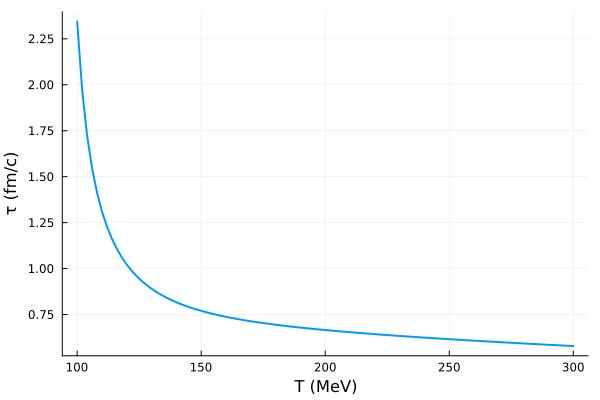

In [19]:
Ts = 300.0:-2.00:100.0
mu_B1 = 750.0
mu_B2 = 0.0
mu_B3 = 850.0

taus1 = [tau(T/hc, mu_B3/3/hc) for T in Ts]

plot(Ts, taus1, xlabel="T (MeV)", ylabel="τ (fm/c)", lw=2, legend=false) 



In [14]:
using Revise
include("../../src/Finite_Vol/Rep.jl")

using Plots, LaTeXStrings

In [ ]:
R = 30.0
es = [0.0,0.3, 0.7,1.0]


Ts = 300.0:-2.00:100
mu_B = 0.0
data = zeros(length(Ts), 4)  # T, e, eta/s, sigma_T
# 想要：先固定 e 跑完 Ts -> 这里要对调 inner/outer


Tcs = [191, 188, 185, 183]
for (i, e) in enumerate(es)
    println("e = $e")
    X0 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    Lambda_T = 191 * 0.445 /hc
    ints = get_nodes_el_hard(128, a, b, c, modes="D")

    for (j, T) in enumerate(Ts)
       # println("T = $T MeV")
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        trans = trans_eff(X0, T/hc, mu_B/hc, ints;Lambda_T=Lambda_T)
        s = DTOmega(X0*1.001, T/hc, mu_B/hc, ints)
        eta = trans[3]/s 
        sigma_T = trans[4]
        data[j,1] = T/191
        data[j,2] = e
        data[j, 3] = eta 
        data[j, 4] = sigma_T
    end
    df = DataFrame(data, [:T, :e, :eta_s, :sigma_T])
    CSV.write("Trans_coff_deform_muB=$(mu_B)_delta=$e.csv", df)
end


e = 0.0
a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
e = 0.3
a,b,c=19.73715118825253,19.73715118825253,69.3098291707641
 IR=0.07721472779646142
e = 0.7
a,b,c=15.054423577707304,15.054423577707304,119.13393901548238
 IR=0.09991456044294313
e = 1.0
a,b,c=13.57636520545484,13.57636520545484,146.4862091040697
 IR=0.11059769513806485
